# 微分方程式の数値解法

## 1. 線形差分方程式

散文方程式 $\frac{dx}{dt} = - rx\ (r>0)$ 時間幅 $\Delta t$ を変化させ，微分方程式の時間発展を確認する

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1,d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')

In [2]:
def solve(x0,r,dt,T):
    xs = np.ones(T) * x0
    for t in range(T-1):
        xs[t+1] = (1 - r*dt) * xs[t]
    return xs

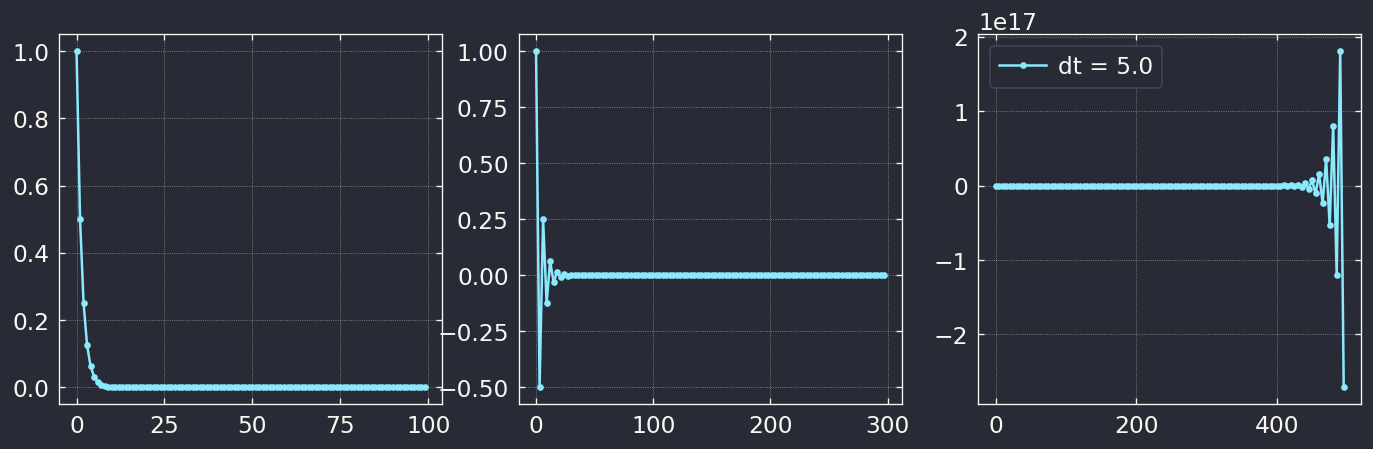

In [3]:
x0 = 1.0 #初期値
r = 0.5 #比例定数
T = 100 #反復回数

_, axes = plt.subplots(1,3,figsize=(14,4))
dt_lst = [1.0, 3.0, 5.0] # 時間幅
for i in range(3):
    dt = dt_lst[i]
    ts = np.arange(T)*dt
    axes[i].plot(ts, solve(x0,r,dt,T), marker='o', markersize=3,label=f"dt = {dt}")
plt.legend()

## 2. 数値積分

解法
- Euler
- Runge-Kutta 4-4

関数
1. $f_1(x,t) = t$ =>  $F_1(x,t) = x_0 + (t^2 - t_0^2)/2$
2. $f_2(x,t) = xt$ =>  $F_2(x,t) = x_0\exp\{(t^2-t_0^2)/2\}$

In [4]:
# 被積分関数
def func1(x,t):
    return t

# 積分した関数（厳密解）
def Func1(t):
    return t*t/2


# 被積分関数
def func2(x,t):
    return x*t

# 積分した関数（厳密解）
def Func2(t, x0, t0):
    return x0 * np.exp((t**2 - t0**2)/2)

In [5]:
def euler(func,x0,t0,dt,T):
    ts = t0 + np.arange(T)*dt
    xs = np.ones(T) * x0
    for t in range(T-1):
        xs[t+1] = xs[t] + func(xs[t],ts[t])*dt
    return xs

# Runge-Kutta 4
def RK4(func,x0,t0,dt,T):
    ts = t0 + np.arange(T)*dt
    xs = np.ones(T) * x0
    for i in range(T-1):
        x = xs[i]
        t = ts[i]
        k1 = func(x,t)
        k2 = func(x+k1*dt/2,t+dt/2)
        k3 = func(x+k2*dt/2,t+dt/2)
        k4 = func(x+k3*dt,t+dt)
        xs[i+1] = x + (k1+ 2*k2 + 2*k3 + k4) / 6 * dt
    return xs

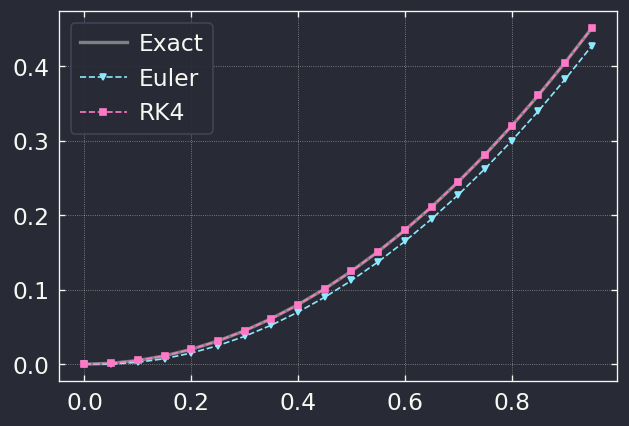

In [6]:
t0 = 0.0 #初期時刻
x0 = 0.0 #初期値
dt = 0.05 #時間幅
T = math.ceil(1/dt)

ts = t0 + np.arange(T)*dt
xs_exact = Func1(ts)
xs_euler = euler(func1,x0,t0,dt,T)
xs_rk4 = RK4(func1, x0,t0,dt,T)

plt.plot(ts, xs_exact, color='grey', linewidth='2', label="Exact")
plt.plot(ts, xs_euler, marker='v', markersize=4, linewidth=1, linestyle='--', label=f"Euler")
plt.plot(ts, xs_rk4, marker='s', markersize=4, linewidth=1, linestyle='--', label=f"RK4")
plt.legend()

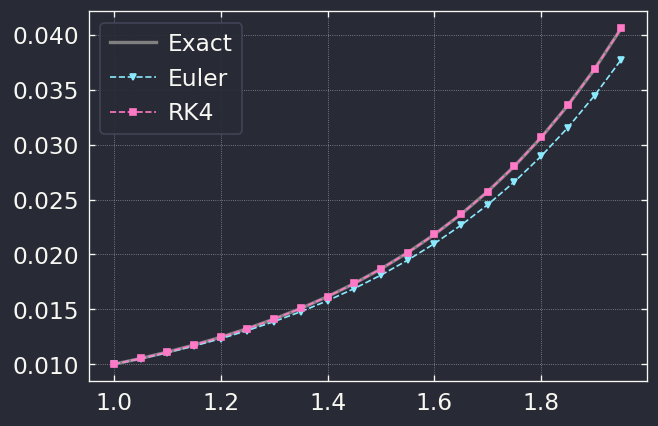

In [7]:
t0 = 1.0 #初期時刻
x0 = 0.01 #初期値
dt = 0.05 #時間幅
T = math.ceil(1/dt)

ts = t0 + np.arange(T)*dt
xs_exact = Func2(ts, x0, t0)
xs_euler = euler(func2,x0,t0,dt,T)
xs_rk4 = RK4(func2,x0,t0,dt,T)

plt.plot(ts, xs_exact, color='grey', linewidth='2', label="Exact")
plt.plot(ts, xs_euler, marker='v', markersize=4, linewidth=1, linestyle='--', label=f"Euler")
plt.plot(ts, xs_rk4, marker='s', markersize=4, linewidth=1, linestyle='--', label=f"RK4")
plt.legend()

### 3変数関数の数値積分

RK4を拡張する

In [8]:
def f1(t,x1,x2,x3):
    return 1 - 2*x1 + x2

def f2(t,x1,x2,x3):
    return x1 - 2*x2 + x3

def f3(t,x1,x2,x3):
    return x2 - 2*x3

# 他変数
def runge_kutta_3d(x10,x20,x30,t0,dt,T):
    x1 = x10
    x2 = x20
    x3 = x30
    t = t0
    xs1 = [x10]
    xs2 = [x20]
    xs3 = [x30]
    ts = [t0]
    for i in range(T):
        k11 = f1(t,x1,x2,x3)
        k21 = f2(t,x1,x2,x3)
        k31 = f3(t,x1,x2,x3)
        
        k12 = f1(t+dt/2,x1+k11*dt/2,x2+k21*dt/2,x3+k31*dt/2)
        k22 = f2(t+dt/2,x1+k11*dt/2,x2+k21*dt/2,x3+k31*dt/2)
        k32 = f3(t+dt/2,x1+k11*dt/2,x2+k21*dt/2,x3+k31*dt/2)
            
        k13 = f1(t+dt/2,x1+k12*dt/2,x2+k22*dt/2,x3+k32*dt/2)
        k23 = f2(t+dt/2,x1+k12*dt/2,x2+k22*dt/2,x3+k32*dt/2)
        k33 = f3(t+dt/2,x1+k12*dt/2,x2+k22*dt/2,x3+k32*dt/2)
        
        k14 = f1(t+dt,  x1+k13*dt,  x2+k23*dt,  x3+k33*dt)
        k24 = f2(t+dt,  x1+k13*dt,  x2+k23*dt,  x3+k33*dt)
        k34 = f3(t+dt,  x1+k13*dt,  x2+k23*dt,  x3+k33*dt)
        
        x1 += (k11+ 2*k12 + 2*k13 + k14) / 6 * dt
        x2 += (k21+ 2*k22 + 2*k23 + k24) / 6 * dt
        x3 += (k31+ 2*k32 + 2*k33 + k34) / 6 * dt
        
        xs1.append(x1)
        xs2.append(x2)
        xs3.append(x3)
        
        t += dt
        ts.append(t)
    return ts,xs1,xs2,xs3

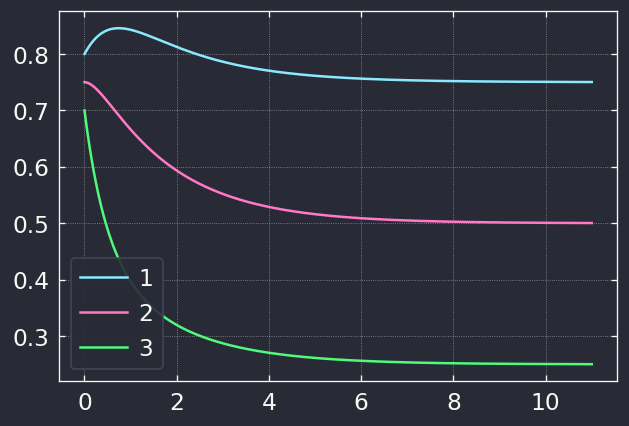

In [9]:
t0 = 0.0 #初期時刻
x10 = 0.8 #x1の初期値
x20 = 0.75 #x2の初期値
x30 = 0.7 #x3の初期値
dt = 0.01 #時間幅
T = math.ceil(t0+1/dt) + 1000

ts,xs1,xs2,xs3 = runge_kutta_3d(x10,x20,x30,t0,dt,T)
plt.plot(ts,xs1,label=1)
plt.plot(ts,xs2,label=2)
plt.plot(ts,xs3,label=3)
plt.legend()